# M5-L1 Problem 3 (6 Points)

Let's revisit the initial speed vs. launch angle data from the logistic regression module. This time, you will train a decision tree classifier to predict whether a projectile launched with a given speed and angle will hit a target.

Run this cell to load the data and decision tree tools:

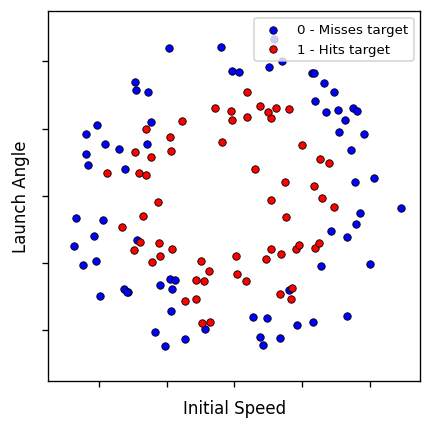

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
x1 = np.array([0.02693745, 0.41186575, 0.10363585, 0.08489663, 0.09512868, 0.31121109, 0.16015486, 0.75698706, 0.86103276, 0.25450354, 0.59727713, 0.11117203, 0.2118569 , 0.90002177, 0.88339852, 0.81076366, 0.9134383 , 0.66078219, 0.57511227, 0.83446708, 0.87207792, 0.63484916, 0.17641653, 0.58623713, 0.77185587, 0.27969298, 0.76628621, 0.78704918, 0.03260164, 0.24102818, 0.45931531, 0.5553572 , 0.0615199 , 0.05104643, 0.85777048, 0.18454679, 0.17247071, 0.18382613, 0.83261753, 0.29546316, 0.24476501, 0.06188762, 0.35479775, 0.84468926, 0.26562408, 0.31266695, 0.61840113, 0.79493902, 0.3079022 , 0.20639025, 0.08952284, 0.11775381, 0.99160872, 0.85210361, 0.60150808, 0.72871228, 0.32553542, 0.49231061, 0.06757372, 0.51293352, 0.73524444, 0.80625762, 0.31447886, 0.73980573, 0.64020137, 0.20844947, 0.68399447, 0.8614671 , 0.73138609, 0.8282699 , 0.6382059 , 0.2402172 , 0.2191855 , 0.60897248, 0.50482995, 0.40076302, 0.69944178, 0.68322982, 0.38699737, 0.7942779 , 0.66176057, 0.59454139, 0.60979337, 0.28162158, 0.561978  , 0.6360264 , 0.53396978, 0.22126403, 0.20591415, 0.75288355, 0.35277133, 0.12387452, 0.41024511, 0.66943243, 0.6534378 , 0.6677045 , 0.75920895, 0.31393471, 0.40585142, 0.60007637, 0.22901595, 0.65065447, 0.53630916, 0.6078229 , 0.50733494, 0.49252727, 0.30893962, 0.69164516, 0.38543013, 0.73631178, 0.6231992 , 0.31464876, 0.20309569, 0.46454817, 0.73854501, 0.25778844, 0.16899741, 0.276636  , 0.42571213, 0.34623966, 0.25249608, 0.53763073, 0.57613609, 0.75106557, 0.42734051, 0.27302061, 0.49041099, 0.44201602, 0.78100287, 0.23748921])-0.5
x2 = np.array([0.3501823 , 0.10349458, 0.20137442, 0.37973165, 0.71062143, 0.25377085, 0.64055034, 0.29218012, 0.41610854, 0.72074402, 0.13748866, 0.42862148, 0.36870966, 0.29806405, 0.68347154, 0.68944199, 0.55280589, 0.21861136, 0.07986956, 0.14388321, 0.44971031, 0.07738745, 0.57988363, 0.05595551, 0.74979864, 0.23396347, 0.83605613, 0.39598089, 0.43543082, 0.65389891, 0.94361628, 0.13925514, 0.62396066, 0.29410959, 0.54243565, 0.21246836, 0.22169931, 0.21435268, 0.37728635, 0.05211104, 0.8104757 , 0.6829834 , 0.07475538, 0.63703731, 0.09345901, 0.15598365, 0.96578717, 0.80986228, 0.94065416, 0.83852381, 0.30622388, 0.65524094, 0.4640243 , 0.76279551, 0.8840741 , 0.86703352, 0.2497341 , 0.87174298, 0.59292618, 0.86911399, 0.8654347 , 0.75457663, 0.2220472 , 0.7832285 , 0.90191786, 0.81549632, 0.11524284, 0.75269284, 0.12477074, 0.72641957, 0.32692003, 0.70036832, 0.56839658, 0.34169059, 0.3212157 , 0.304839  , 0.65177393, 0.34079171, 0.1943221 , 0.46750584, 0.75934886, 0.31240097, 0.73073311, 0.32049905, 0.58032973, 0.20709977, 0.24701365, 0.36393944, 0.63103063, 0.61059462, 0.18643247, 0.56799519, 0.24591095, 0.22541827, 0.4384616 , 0.19224338, 0.49279951, 0.63452085, 0.12069456, 0.74973512, 0.44061972, 0.54129865, 0.73561255, 0.48845014, 0.26644964, 0.7272455 , 0.67658067, 0.3527117 , 0.25076322, 0.52805314, 0.76158356, 0.34050983, 0.3398095 , 0.6608739 , 0.34343993, 0.30274956, 0.40601433, 0.36011736, 0.27654899, 0.72299134, 0.61689563, 0.8099134 , 0.76758364, 0.36026671, 0.12536261, 0.48062248, 0.75285467, 0.76160529, 0.59633481, 0.56288792])-0.5
X = np.vstack([x1, x2]).T

def plot_data(X,y):
    colors=["blue","red"]
    labels = ["0 - Misses target", "1 - Hits target"]
    for i in range(2):
        plt.scatter(X[y==i,0],X[y==i,1],s=20,c=colors[i],edgecolors="black",linewidths=.5,label=labels[i])
        plt.xlabel("Initial Speed")
        plt.ylabel("Launch Angle")
        plt.legend(loc="upper right",prop={'size':8})
        ax = plt.gca()
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.xlim([-0.55,.55])
        plt.ylim([-0.55,.55])

plt.figure(figsize=(4,4),dpi=120)
plot_data(X,y)
plt.show()

## Training a decision tree classifier.
Below, a decision tree of max depth 4 is trained, and the tree is visualized with `plot_tree()`.

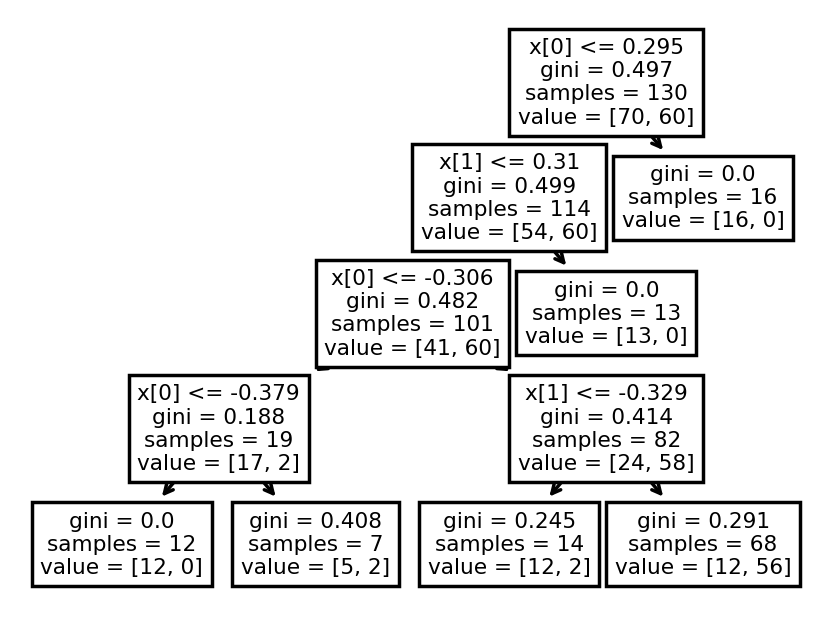

In [2]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X,y)

plt.figure(figsize=(4,3),dpi=250)
plot_tree(dt)
plt.show()

## Accuracy on training data
Compute the accuracy on the training data with the provided function `get_dt_accuracy(dt, X, y)`. Print the result.

In [3]:
def get_dt_accuracy(dt, X, y):
    pred = dt.predict(X)
    return 100*np.sum(pred == y)/len(y)

# YOUR CODE GOES HERE
accuracy = get_dt_accuracy(dt, X, y)
print(f"Accuracy: {accuracy:.3f}%")

Accuracy: 87.692%


## Visualizing tree predictions
By evaluating the model on a meshgrid of results, we can look at how our model performs on the input space:

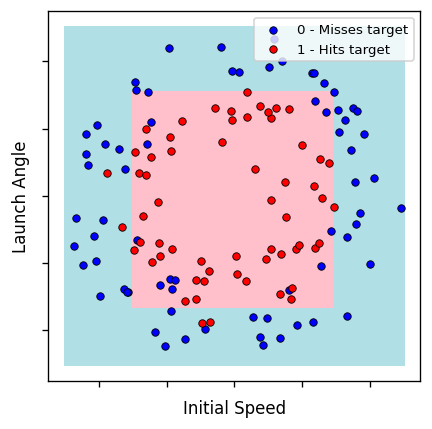

In [4]:
vals = np.linspace(-.5,.5,100)
x1grid, x2grid = np.meshgrid(vals, vals)
X_test = np.vstack([x1grid.flatten(), x2grid.flatten()]).T

pred = dt.predict(X_test)

plt.figure(figsize=(4,4),dpi=120)
bgcolors = ListedColormap(["powderblue","pink"])
plt.pcolormesh(x1grid, x2grid, pred.reshape(x1grid.shape), shading="nearest",cmap=bgcolors)
plot_data(X,y)
plt.show()

## Expanded feature set
Now, we will add a third feature that (for this problem) happens to be very useful. That feature is $x_1^2 + x_2^2$. A new training input `X_ex` is generated below containing this additional feature.  

Train a new decision tree, max depth 4, on this data. Then visualize the tree with `plot_tree()`.

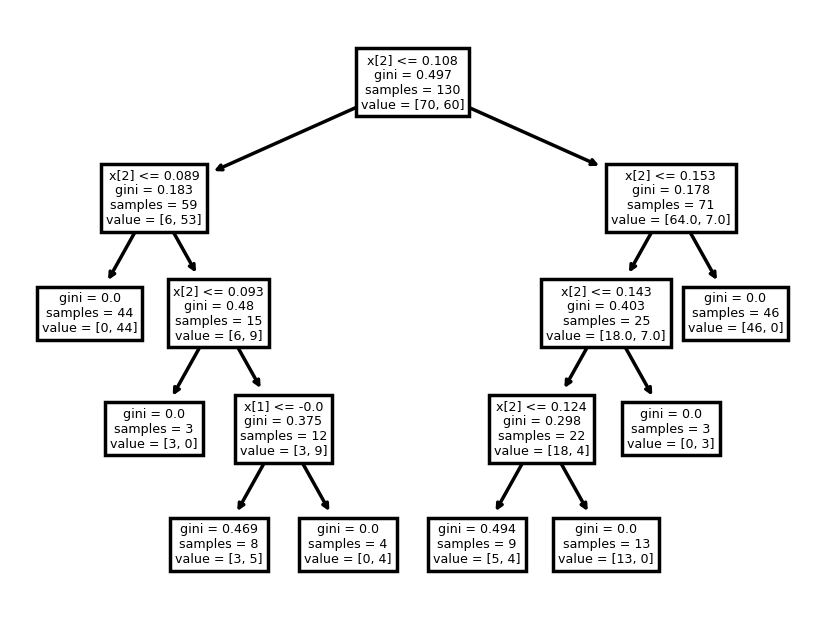

In [5]:
def feature_expand(X):
    x1 = X[:,0].reshape(-1, 1)
    x2 = X[:,1].reshape(-1, 1)
    columns = [x1, x2, x1*x1 + x2*x2]
    return np.concatenate(columns, axis=1)

X_ex = feature_expand(X)

# YOUR CODE GOES HERE
# Train a new decision tree on X_ex, y
dt_ex = DecisionTreeClassifier(max_depth=4)
dt_ex.fit(X_ex,y)
# Plot the tree
plt.figure(figsize=(4,3),dpi=250)
plot_tree(dt_ex)
plt.show()

## Accuracy on training data: expanded features
Compute the accuracy of this new model its training data. It should have increased. Note that the useful features to expand will vary significantly from problem to problem.

In [6]:
# YOUR CODE GOES HERE
accuracy_ex = get_dt_accuracy(dt_ex, X_ex, y)
print(f"Accuracy: {accuracy_ex:.3f}%")

Accuracy: 94.615%


## Visualizing expanded feature results
Use your model to make a prediction called `pred` on the data `X_test_ex`, an expanded meshgrid of points, as indicated. This code will plot the class decisions. Note the difference between this and the previous model, which only had speed and angle as features.

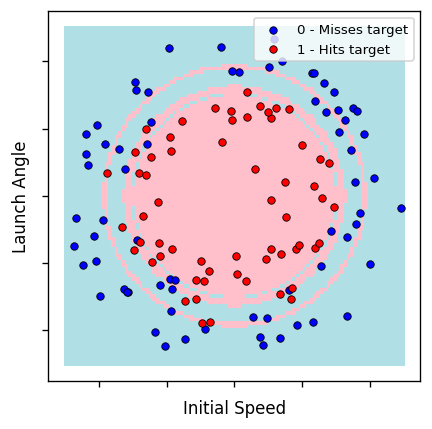

In [7]:
X_test_ex = feature_expand(X_test)
# YOUR CODE GOES HERE
# Have your model make a prediction, `pred` on X_test_ex
pred = dt_ex.predict(X_test_ex)

plt.figure(figsize=(4,4),dpi=120)
bgcolors = ListedColormap(["powderblue","pink"])
plt.pcolormesh(x1grid, x2grid, pred.reshape(x1grid.shape), shading="nearest",cmap=bgcolors)
plot_data(X,y)
plt.show()